# A Decade of Netflix Viewing Activity Analysis

In this notebook, I analyze my Netflix account's viewing history, which dates back to 2011. The data was requested from Netflix and then downloaded. I only used one of the many files they sent me that contained my viewing activity. I first clean and format it for analysis. Then I analyze it including all profiles data, and then I analyze my own profile's data. 

In [1]:
# import all the packages we will need
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import style
from pandas.api.types import CategoricalDtype


%matplotlib inline

In [2]:
viewing = pd.read_csv('ViewingActivity.csv')
viewing.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Alex,2021-04-12 03:00:21,00:00:14,Autoplayed: user action: None;,The Stand-In_hook_03_16x9,HOOK,Chrome PC (Cadmium),00:00:14,00:00:14,US (United States)
1,Alex,2021-04-11 02:31:05,00:02:28,NaN,Grace and Frankie: Season 1: The Vows (Episode...,NaN,Chrome PC (Cadmium),00:03:12,00:03:12,US (United States)
2,Alex,2021-04-11 02:14:45,00:16:19,NaN,Grace and Frankie: Season 1: The Bachelor Part...,NaN,Chrome PC (Cadmium),00:27:06,00:27:06,US (United States)
3,Alex,2021-04-10 22:04:17,00:00:19,NaN,The Pianist,NaN,Apple iPhone XR,00:00:19,00:00:19,US (United States)
4,Alex,2021-04-10 22:03:27,00:00:32,Autoplayed: user action: None;,The Pianist_hook_primary_16x9,HOOK,Apple iPhone XR,00:00:32,00:00:32,US (United States)


## Viewing Activity

In [3]:
print(viewing.shape)
print(viewing.info())

(76225, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76225 entries, 0 to 76224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Profile Name             76225 non-null  object
 1   Start Time               76225 non-null  object
 2   Duration                 76225 non-null  object
 3   Attributes               18634 non-null  object
 4   Title                    76225 non-null  object
 5   Supplemental Video Type  2425 non-null   object
 6   Device Type              76225 non-null  object
 7   Bookmark                 76225 non-null  object
 8   Latest Bookmark          76225 non-null  object
 9   Country                  76225 non-null  object
dtypes: object(10)
memory usage: 5.8+ MB
None


## Removing unnecessary columns
There are several columns that we will not need for our analysis. We will go ahead and delete them.

In [4]:
viewing = viewing.drop(['Attributes','Device Type','Supplemental Video Type','Bookmark','Latest Bookmark','Country'], axis=1)
print(viewing.head())
print(viewing.info())
print(viewing.shape)

  Profile Name           Start Time  Duration  \
0         Alex  2021-04-12 03:00:21  00:00:14   
1         Alex  2021-04-11 02:31:05  00:02:28   
2         Alex  2021-04-11 02:14:45  00:16:19   
3         Alex  2021-04-10 22:04:17  00:00:19   
4         Alex  2021-04-10 22:03:27  00:00:32   

                                               Title  
0                          The Stand-In_hook_03_16x9  
1  Grace and Frankie: Season 1: The Vows (Episode...  
2  Grace and Frankie: Season 1: The Bachelor Part...  
3                                        The Pianist  
4                      The Pianist_hook_primary_16x9  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76225 entries, 0 to 76224
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Profile Name  76225 non-null  object
 1   Start Time    76225 non-null  object
 2   Duration      76225 non-null  object
 3   Title         76225 non-null  object
dtypes: object(

We have cut the number of columns and memory usage in half.

## Standardize column names

In [5]:
viewing = viewing.rename(columns={'Profile Name':'profile_name', 'Start Time':'start_time','Duration':'duration','Title':'title',})
viewing.head()

,profile_name,start_time,duration,title
0,Alex,2021-04-12 03:00:21,00:00:14,The Stand-In_hook_03_16x9
1,Alex,2021-04-11 02:31:05,00:02:28,Grace and Frankie: Season 1: The Vows (Episode...
2,Alex,2021-04-11 02:14:45,00:16:19,Grace and Frankie: Season 1: The Bachelor Part...
3,Alex,2021-04-10 22:04:17,00:00:19,The Pianist
4,Alex,2021-04-10 22:03:27,00:00:32,The Pianist_hook_primary_16x9


## Converting strings to Datetime and Timedelta
To analyze viewing time, we need to convert our start_time column datatype to Datetime, and Duration to Timedelta datatype.

In [6]:
viewing['start_time'] = pd.to_datetime(viewing['start_time'], utc=True)
viewing.dtypes

profile_name                 object
start_time      datetime64[ns, UTC]
duration                     object
title                        object
dtype: object

In [7]:
viewing = viewing.set_index('start_time')

# convert time to Central Time
viewing.index = viewing.index.tz_convert('US/Central')

viewing = viewing.reset_index()

In [8]:
viewing['duration'] = pd.to_timedelta(viewing['duration'])
viewing.dtypes

start_time      datetime64[ns, US/Central]
profile_name                        object
duration                   timedelta64[ns]
title                               object
dtype: object

In [9]:
viewing.head()

,start_time,profile_name,duration,title
0,2021-04-11 22:00:21-05:00,Alex,0 days 00:00:14,The Stand-In_hook_03_16x9
1,2021-04-10 21:31:05-05:00,Alex,0 days 00:02:28,Grace and Frankie: Season 1: The Vows (Episode...
2,2021-04-10 21:14:45-05:00,Alex,0 days 00:16:19,Grace and Frankie: Season 1: The Bachelor Part...
3,2021-04-10 17:04:17-05:00,Alex,0 days 00:00:19,The Pianist
4,2021-04-10 17:03:27-05:00,Alex,0 days 00:00:32,The Pianist_hook_primary_16x9


## Filter out durations less than 10 minutes

In [10]:
viewing = viewing[(viewing['duration'] > '0 days 0 hours 10 minutes 0 seconds')]
viewing.shape

(51397, 4)

This deleted 24,828 rows (about 1/3 of our data) where the duration was less than 10 minutes. I chose 10 minutes as the cutoff because it is less than the amount of time I take to eat. So any observation less than 10 minutes was either due to browsing or a miss-click. 

In [11]:
viewing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51397 entries, 2 to 76224
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype                     
---  ------        --------------  -----                     
 0   start_time    51397 non-null  datetime64[ns, US/Central]
 1   profile_name  51397 non-null  object                    
 2   duration      51397 non-null  timedelta64[ns]           
 3   title         51397 non-null  object                    
dtypes: datetime64[ns, US/Central](1), object(2), timedelta64[ns](1)
memory usage: 2.0+ MB


## Create Weekday, Hour, Year, Month, Seconds, Minutes, Hours Columns
This will allow us to discover more interesting results like ,"which day of the week is the most active?"

In [12]:
viewing['weekday'] = viewing['start_time'].dt.weekday
viewing['hour'] = viewing['start_time'].dt.hour
viewing['year'] = viewing['start_time'].dt.year
viewing['month'] = viewing['start_time'].dt.month
viewing['seconds'] = viewing['duration'].dt.total_seconds()
viewing['minutes'] = viewing['seconds'] / 60
viewing['hours'] = viewing['seconds'] / 3600

viewing.head()

,start_time,profile_name,duration,title,weekday,hour,year,month,seconds,minutes,hours
2,2021-04-10 21:14:45-05:00,Alex,0 days 00:16:19,Grace and Frankie: Season 1: The Bachelor Part...,5,21,2021,4,979.0,16.316667,0.271944
6,2021-04-10 13:31:35-05:00,Alex,0 days 00:10:02,Grace and Frankie: Season 1: The Bachelor Part...,5,13,2021,4,602.0,10.033333,0.167222
7,2021-04-10 13:15:05-05:00,Alex,0 days 00:16:29,Grace and Frankie: Season 1: The Secrets (Epis...,5,13,2021,4,989.0,16.483333,0.274722
11,2021-04-09 18:35:03-05:00,Alex,0 days 00:20:32,Grace and Frankie: Season 1: The Elevator (Epi...,4,18,2021,4,1232.0,20.533333,0.342222
18,2021-04-09 15:11:40-05:00,Alex,0 days 00:14:38,Grace and Frankie: Season 1: The Invitation (E...,4,15,2021,4,878.0,14.633333,0.243889


In [13]:
viewing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51397 entries, 2 to 76224
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype                     
---  ------        --------------  -----                     
 0   start_time    51397 non-null  datetime64[ns, US/Central]
 1   profile_name  51397 non-null  object                    
 2   duration      51397 non-null  timedelta64[ns]           
 3   title         51397 non-null  object                    
 4   weekday       51397 non-null  int64                     
 5   hour          51397 non-null  int64                     
 6   year          51397 non-null  int64                     
 7   month         51397 non-null  int64                     
 8   seconds       51397 non-null  float64                   
 9   minutes       51397 non-null  float64                   
 10  hours         51397 non-null  float64                   
dtypes: datetime64[ns, US/Central](1), float64(3), int64(4), object(2), timedelta64[n

## Explore columns

In [14]:
viewing.groupby(['profile_name','year'])['hours'].sum()

profile_name  year
Alex          2013     123.373056
              2014     270.473889
              2015     636.639722
              2016     958.080000
              2017     920.371389
              2018    1195.961944
              2019     911.359444
              2020     990.140556
              2021     432.064722
Katalina      2011      87.761389
              2012     808.402778
              2013    1627.766944
              2014     589.131944
              2015       6.673056
              2016     349.657778
              2017     146.776944
              2018      71.039167
              2019     278.755278
              2020     912.907222
              2021     323.446111
darynka       2014     113.585833
              2015     450.550278
              2016     921.610556
              2017     928.481389
              2018    1646.350278
              2019     651.494722
              2020    1113.219444
              2021     411.366389
kathy         2014     291.39

We need to attribute 2011 and 2012 year data from Katalina to Alex. A mix up of profiles and renaming caused this when I first got Netflix. 

In [15]:
viewing['profile_name'] = np.where((viewing.year == 2011),'Alex',viewing['profile_name'])
viewing['profile_name'] = np.where((viewing.year == 2012),'Alex',viewing['profile_name'])
viewing.groupby(['profile_name','year'])['hours'].sum()

profile_name  year
Alex          2011      87.761389
              2012     808.402778
              2013     123.373056
              2014     270.473889
              2015     636.639722
              2016     958.080000
              2017     920.371389
              2018    1195.961944
              2019     911.359444
              2020     990.140556
              2021     432.064722
Katalina      2013    1627.766944
              2014     589.131944
              2015       6.673056
              2016     349.657778
              2017     146.776944
              2018      71.039167
              2019     278.755278
              2020     912.907222
              2021     323.446111
darynka       2014     113.585833
              2015     450.550278
              2016     921.610556
              2017     928.481389
              2018    1646.350278
              2019     651.494722
              2020    1113.219444
              2021     411.366389
kathy         2014     291.39

Alex's profile now contains data from 2011 and 2012. This more accurately represents Netflix activity.

In [16]:
# profile activity frequency
viewing['profile_name'].value_counts()

Alex         12558
darynka      12204
kathy         9396
steffanie     9110
Katalina      8129
Name: profile_name, dtype: int64

## Obtain only the Show/Movie Title

In [17]:
viewing['title'] = viewing['title'].str.split(':').str[0]
viewing.head()

,start_time,profile_name,duration,title,weekday,hour,year,month,seconds,minutes,hours
2,2021-04-10 21:14:45-05:00,Alex,0 days 00:16:19,Grace and Frankie,5,21,2021,4,979.0,16.316667,0.271944
6,2021-04-10 13:31:35-05:00,Alex,0 days 00:10:02,Grace and Frankie,5,13,2021,4,602.0,10.033333,0.167222
7,2021-04-10 13:15:05-05:00,Alex,0 days 00:16:29,Grace and Frankie,5,13,2021,4,989.0,16.483333,0.274722
11,2021-04-09 18:35:03-05:00,Alex,0 days 00:20:32,Grace and Frankie,4,18,2021,4,1232.0,20.533333,0.342222
18,2021-04-09 15:11:40-05:00,Alex,0 days 00:14:38,Grace and Frankie,4,15,2021,4,878.0,14.633333,0.243889


This is a rough way to get the show or movie title, but this will be enough for the scope of this analysis.

Now let us correct profile names.

In [18]:
viewing['profile_name'].replace('steffanie','Stephanie', inplace=True)
viewing['profile_name'].replace('kathy','Kathy', inplace=True)
viewing['profile_name'].replace('Katalina','Catalina', inplace=True)
viewing['profile_name'].replace('darynka','Darynka', inplace=True)

viewing['profile_name'].value_counts()

Alex         12558
Darynka      12204
Kathy         9396
Stephanie     9110
Catalina      8129
Name: profile_name, dtype: int64

Add State location to observations in the US.

In [19]:
states = {'Alex':'Arkansas', 'darynka':'Arkansas', 'kathy':'Texas', 'steffanie':'Texas', 'Katalina':'Durango'}
viewing['state'] = viewing['profile_name'].map(states)
viewing.head()

,start_time,profile_name,duration,title,weekday,hour,year,month,seconds,minutes,hours,state
2,2021-04-10 21:14:45-05:00,Alex,0 days 00:16:19,Grace and Frankie,5,21,2021,4,979.0,16.316667,0.271944,Arkansas
6,2021-04-10 13:31:35-05:00,Alex,0 days 00:10:02,Grace and Frankie,5,13,2021,4,602.0,10.033333,0.167222,Arkansas
7,2021-04-10 13:15:05-05:00,Alex,0 days 00:16:29,Grace and Frankie,5,13,2021,4,989.0,16.483333,0.274722,Arkansas
11,2021-04-09 18:35:03-05:00,Alex,0 days 00:20:32,Grace and Frankie,4,18,2021,4,1232.0,20.533333,0.342222,Arkansas
18,2021-04-09 15:11:40-05:00,Alex,0 days 00:14:38,Grace and Frankie,4,15,2021,4,878.0,14.633333,0.243889,Arkansas


In [20]:
viewing['state'].value_counts()

Arkansas    12558
Name: state, dtype: int64

In [21]:
# Add names to weekdays
weekdays = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
viewing['day'] = viewing['weekday'].map(weekdays)
viewing.head()

,start_time,profile_name,duration,title,weekday,hour,year,month,seconds,minutes,hours,state,day
2,2021-04-10 21:14:45-05:00,Alex,0 days 00:16:19,Grace and Frankie,5,21,2021,4,979.0,16.316667,0.271944,Arkansas,Saturday
6,2021-04-10 13:31:35-05:00,Alex,0 days 00:10:02,Grace and Frankie,5,13,2021,4,602.0,10.033333,0.167222,Arkansas,Saturday
7,2021-04-10 13:15:05-05:00,Alex,0 days 00:16:29,Grace and Frankie,5,13,2021,4,989.0,16.483333,0.274722,Arkansas,Saturday
11,2021-04-09 18:35:03-05:00,Alex,0 days 00:20:32,Grace and Frankie,4,18,2021,4,1232.0,20.533333,0.342222,Arkansas,Friday
18,2021-04-09 15:11:40-05:00,Alex,0 days 00:14:38,Grace and Frankie,4,15,2021,4,878.0,14.633333,0.243889,Arkansas,Friday


## Convert Day to Categorical type

In [22]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

day_type = CategoricalDtype(categories=days, ordered=True)

viewing['day'] = viewing['day'].astype(day_type)

In [23]:
viewing

,start_time,profile_name,duration,title,weekday,hour,year,month,seconds,minutes,hours,state,day
2,2021-04-10 21:14:45-05:00,Alex,0 days 00:16:19,Grace and Frankie,5,21,2021,4,979.0,16.316667,0.271944,Arkansas,Saturday
6,2021-04-10 13:31:35-05:00,Alex,0 days 00:10:02,Grace and Frankie,5,13,2021,4,602.0,10.033333,0.167222,Arkansas,Saturday
7,2021-04-10 13:15:05-05:00,Alex,0 days 00:16:29,Grace and Frankie,5,13,2021,4,989.0,16.483333,0.274722,Arkansas,Saturday
11,2021-04-09 18:35:03-05:00,Alex,0 days 00:20:32,Grace and Frankie,4,18,2021,4,1232.0,20.533333,0.342222,Arkansas,Friday
18,2021-04-09 15:11:40-05:00,Alex,0 days 00:14:38,Grace and Frankie,4,15,2021,4,878.0,14.633333,0.243889,Arkansas,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76214,2014-05-16 22:56:41-05:00,Stephanie,0 days 00:10:48,The Boondocks,4,22,2014,5,648.0,10.800000,0.180000,NaN,Friday
76219,2014-05-11 14:23:14-05:00,Stephanie,0 days 00:14:35,The Boondocks,6,14,2014,5,875.0,14.583333,0.243056,NaN,Sunday
76222,2014-04-27 22:06:29-05:00,Stephanie,0 days 01:24:06,Footloose,6,22,2014,4,5046.0,84.100000,1.401667,NaN,Sunday
76223,2014-04-05 22:14:46-05:00,Stephanie,0 days 00:21:47,Cake Boss,5,22,2014,4,1307.0,21.783333,0.363056,NaN,Saturday


### Set styling for plots

In [61]:
plt.style.use("seaborn-whitegrid")
sns.set_context('talk')
sns.set_palette('colorblind')

In [25]:
# Center plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Explore column by frequency

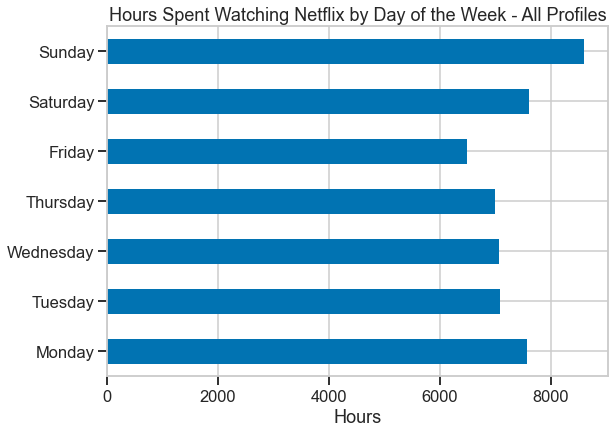

In [95]:
# day of the week frequency
plt.figure(figsize=(8,6))
viewing['day'].value_counts().sort_index().plot(kind='barh')
plt.title("Hours Spent Watching Netflix by Day of the Week - All Profiles")
plt.xlabel('Hours')

plt.savefig('hours_by_dow_all.png', bbox_inches='tight');

Sunday appears to be the most active day, and surprisingly Friday is the least active day.

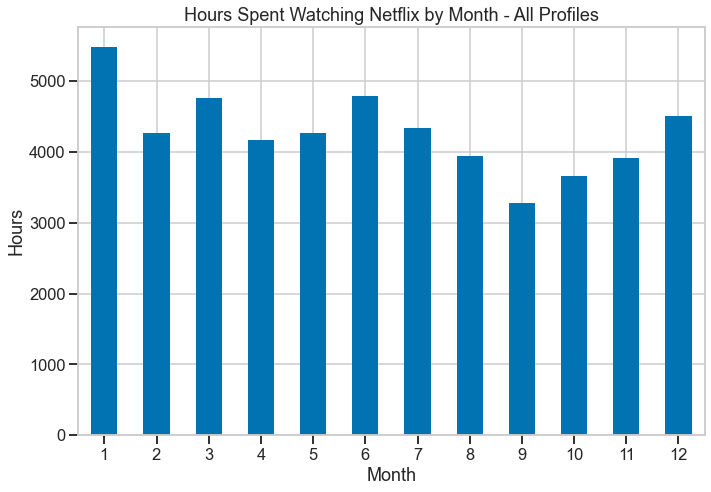

In [96]:
plt.figure(figsize=(10,7))
viewing['month'].value_counts().sort_index().plot(kind='bar')
plt.title('Hours Spent Watching Netflix by Month - All Profiles')
plt.ylabel('Hours')
plt.xlabel('Month')
plt.xticks(rotation=0)

plt.savefig('hours_by_month_all.png', bbox_inches='tight');

January and June appear to be the most active months. June can be understood because of summer vacation, but January has few vacation days. More investigation is needed.

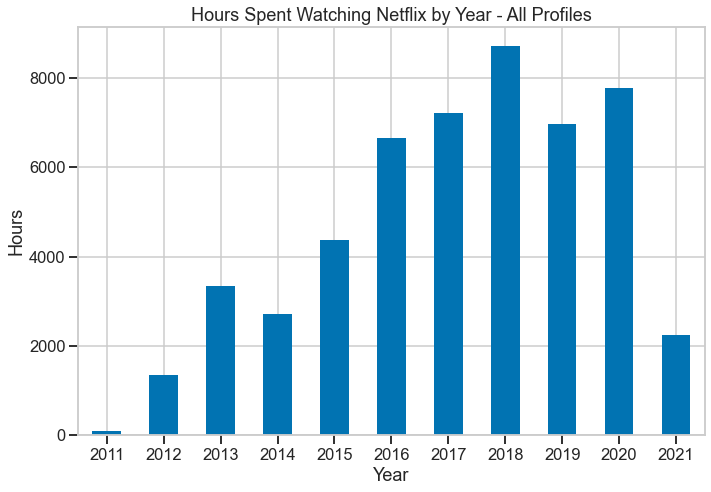

In [97]:
plt.figure(figsize=(10,7))
viewing['year'].value_counts().sort_index().plot(kind='bar')
plt.title('Hours Spent Watching Netflix by Year - All Profiles')
plt.ylabel('Hours')
plt.xlabel('Year')
plt.xticks(rotation=0)

plt.savefig('hours_by_year_all.png', bbox_inches='tight');

Activity increased for the first 7 years and peaked in 2018. It dropped by about 1000 hours in 2019, but picked up again in 2020. Being halfway through the year, I believe this year will have activity comparable to 2015. 

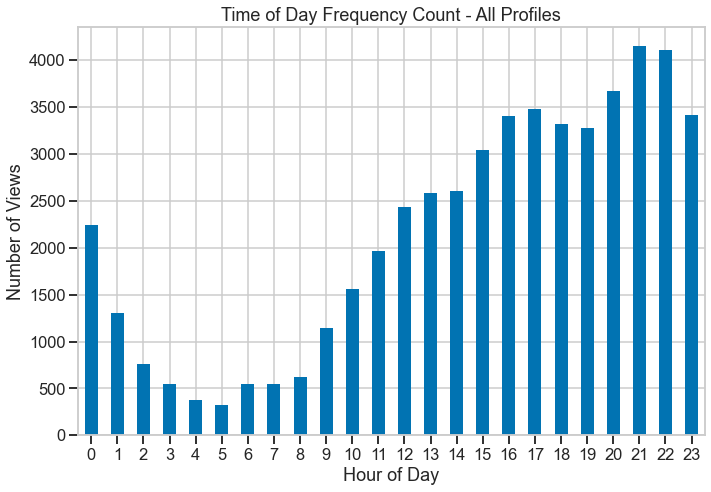

In [98]:
# frequency of hour
plt.figure(figsize=(10,7))
viewing['hour'].value_counts().sort_index().plot(kind='bar')
plt.title('Time of Day Frequency Count - All Profiles')
plt.xticks(rotation=0)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Views')

plt.savefig('time_of_day_frequency_all.png', bbox_inches='tight');

As expected, the most active hours are at night and peak at 9 and 10 pm. 

## Who was watching some of the top shows?

#### Top 10 Shows - All Profiles

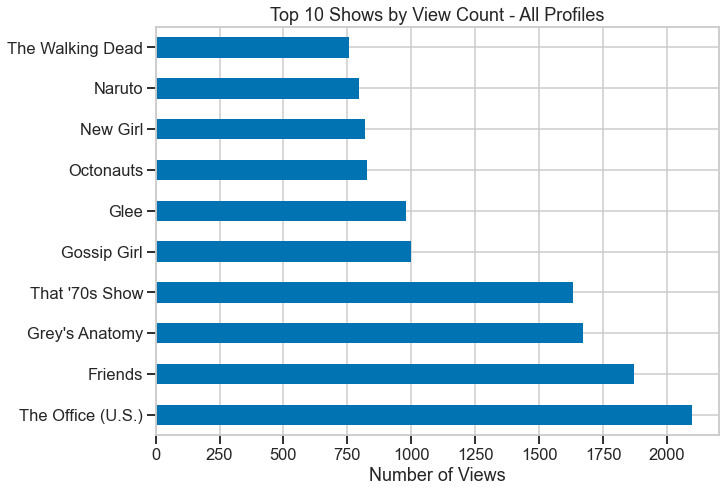

In [99]:
viewing['title'].value_counts()[:10].plot(kind='barh', figsize=(9,7))
plt.title('Top 10 Shows by View Count - All Profiles')
plt.xlabel('Number of Views')

plt.savefig('top_10_shows_all.png', bbox_inches='tight');

In [31]:
the_office = viewing[viewing['title'] == "The Office (U.S.)"]
the_office['profile_name'].value_counts()

Stephanie    1051
Kathy         558
Darynka       388
Catalina       80
Alex           22
Name: profile_name, dtype: int64

In [32]:
friends = viewing[viewing['title'] == 'Friends']
friends['profile_name'].value_counts()

Stephanie    1370
Alex          245
Catalina      182
Darynka        55
Kathy          19
Name: profile_name, dtype: int64

In [33]:
greys_anatomy = viewing[viewing['title'] == "Grey's Anatomy"]
greys_anatomy['profile_name'].value_counts()

Kathy       909
Darynka     625
Catalina     88
Alex         49
Name: profile_name, dtype: int64

In [34]:
that_70s = viewing[viewing['title'] == "That '70s Show"]
that_70s['profile_name'].value_counts()

Kathy        783
Darynka      411
Alex         204
Stephanie    175
Catalina      57
Name: profile_name, dtype: int64

## Create a Dataframe for my activity

In [36]:
alex = viewing[viewing['profile_name'] == 'Alex'] # filter out my activity

# reorder the columns
alex = alex[['start_time','title','duration','day','hour','month','year','seconds','minutes','hours','state']]

alex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12558 entries, 2 to 31063
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype                     
---  ------      --------------  -----                     
 0   start_time  12558 non-null  datetime64[ns, US/Central]
 1   title       12558 non-null  object                    
 2   duration    12558 non-null  timedelta64[ns]           
 3   day         12558 non-null  category                  
 4   hour        12558 non-null  int64                     
 5   month       12558 non-null  int64                     
 6   year        12558 non-null  int64                     
 7   seconds     12558 non-null  float64                   
 8   minutes     12558 non-null  float64                   
 9   hours       12558 non-null  float64                   
 10  state       12558 non-null  object                    
dtypes: category(1), datetime64[ns, US/Central](1), float64(3), int64(3), object(2), timedelta64[ns](1)
memory 

### Descriptive Analysis of my Netflix activity (Alex)

In [37]:
# Viewing time
alex['duration'].sum()

Timedelta('305 days 14:37:44')

Since I first subscribed to Netlfix in 2011, I have streamed over 305 days worth of content. That is a lot, but I have not actively watched all of it. I use it as background study noise most of the time.

### How much time did I spend watching per day of the week?

In [38]:
# frequency of activity by day
alex_weekday = alex['day'].value_counts().sort_index()
alex_weekday

Monday       1979
Tuesday      1914
Wednesday    1913
Thursday     1877
Friday       1501
Saturday     1537
Sunday       1837
Name: day, dtype: int64

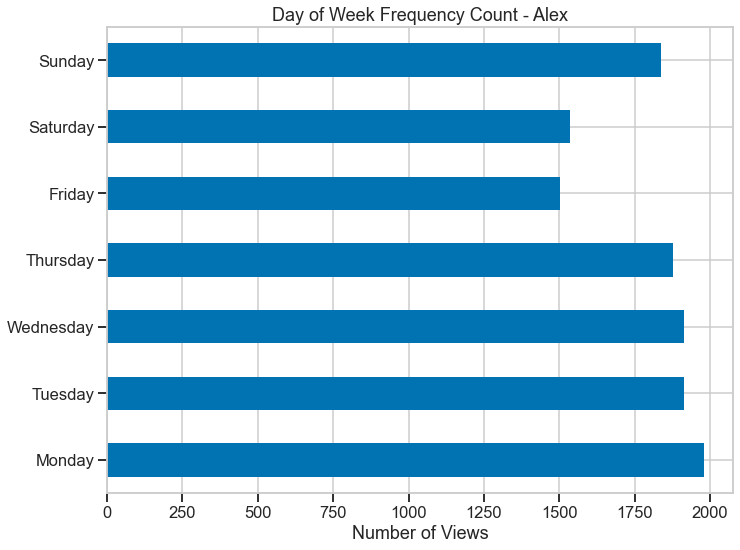

In [100]:
alex['day'].value_counts().sort_index().plot(kind='barh',figsize=(10,8))
plt.title('Day of Week Frequency Count - Alex')
plt.xlabel('Number of Views')

plt.savefig('dow_frequency_alex.png', bbox_inches='tight');

Activity is pretty consistent throughout the week with Friday and Saturday having the lowest frequency.

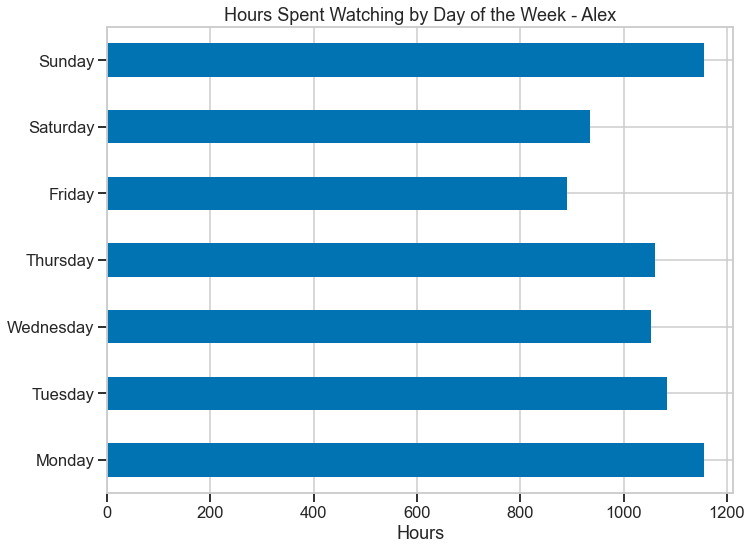

In [101]:
alex_day_hours = alex.groupby('day')['hours'].sum().reset_index()
alex_day_hours.plot(x='day',y='hours',kind='barh',figsize=(10,8),legend=False)
plt.title('Hours Spent Watching by Day of the Week - Alex')
plt.ylabel('')
plt.xlabel('Hours')

plt.savefig('hours_by_dow_alex.png', bbox_inches='tight');

This is very similar to the day of the week frequency graph.

### Top 10 shows by frequency

In [41]:
alex['title'].value_counts()[:10]

Star Trek           640
Supernatural        410
Bones               351
The Walking Dead    271
Friends             245
Doctor Who          226
The Flash           218
That '70s Show      204
Gilmore Girls       202
Weeds               193
Name: title, dtype: int64

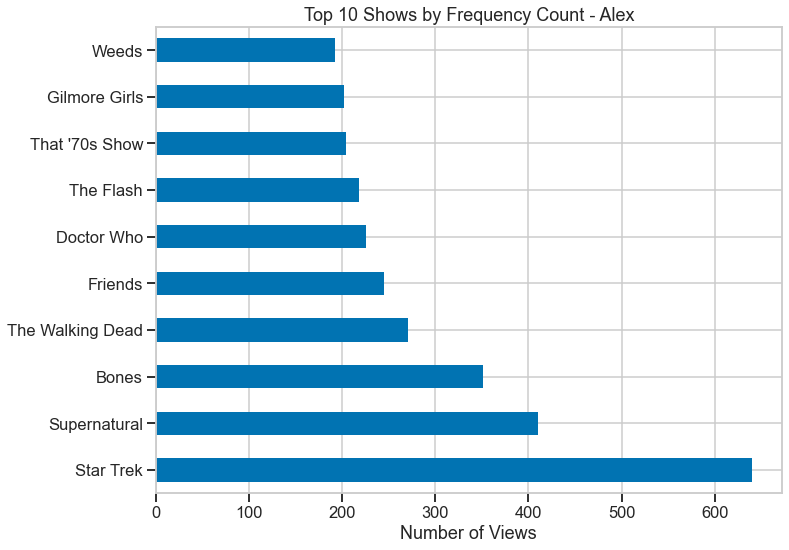

In [102]:
alex['title'].value_counts()[:10].plot(kind='barh',figsize=(10,8))
plt.xticks(rotation=0)
plt.title('Top 10 Shows by Frequency Count - Alex')
plt.xlabel('Number of Views')

plt.savefig('top_10_shows_frequency_alex.png', bbox_inches='tight');

Star Trek is by far my most watched show with over 600 views. Note that Star Trek includes the Next Generation, Deep Space 9, Enterprise, and part of the original series. No, I have not yet watched Voyager.

### Create a dataframe for my top 10 shows

In [43]:
alex_top_10 = ['Star Trek','Bones','Supernatural','The Walking Dead','Friends','Doctor Who','The Flash',"That '70s Show",'Gilmore Girls','Weeds']
mask = alex['title'].isin(alex_top_10)
alex_10 = alex[mask]
alex_10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2960 entries, 118 to 31050
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype                     
---  ------      --------------  -----                     
 0   start_time  2960 non-null   datetime64[ns, US/Central]
 1   title       2960 non-null   object                    
 2   duration    2960 non-null   timedelta64[ns]           
 3   day         2960 non-null   category                  
 4   hour        2960 non-null   int64                     
 5   month       2960 non-null   int64                     
 6   year        2960 non-null   int64                     
 7   seconds     2960 non-null   float64                   
 8   minutes     2960 non-null   float64                   
 9   hours       2960 non-null   float64                   
 10  state       2960 non-null   object                    
dtypes: category(1), datetime64[ns, US/Central](1), float64(3), int64(3), object(2), timedelta64[ns](1)
memory

In [44]:
alex_10.head()

,start_time,title,duration,day,hour,month,year,seconds,minutes,hours,state
118,2021-03-11 20:14:21-06:00,The Walking Dead,0 days 00:31:37,Thursday,20,3,2021,1897.0,31.616667,0.526944,Arkansas
120,2021-03-11 14:40:35-06:00,The Walking Dead,0 days 00:36:41,Thursday,14,3,2021,2201.0,36.683333,0.611389,Arkansas
122,2021-03-11 13:45:10-06:00,The Walking Dead,0 days 00:26:24,Thursday,13,3,2021,1584.0,26.400000,0.440000,Arkansas
123,2021-03-11 12:54:37-06:00,The Walking Dead,0 days 00:11:13,Thursday,12,3,2021,673.0,11.216667,0.186944,Arkansas
124,2021-03-11 12:42:33-06:00,The Walking Dead,0 days 00:11:29,Thursday,12,3,2021,689.0,11.483333,0.191389,Arkansas


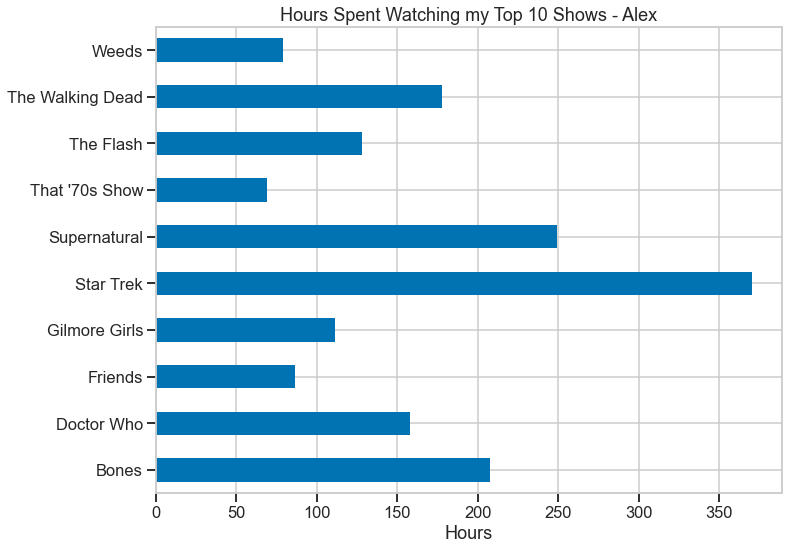

In [103]:
# top 10 shows by time spent watching
alex_10_hours = alex_10.groupby('title')['hours'].sum().reset_index()
#alex_10_hours.sort_values('hours', ascending=False)

alex_10_hours.plot(x='title',y='hours',kind='barh',figsize=(10,8),legend=False)
plt.title('Hours Spent Watching my Top 10 Shows - Alex')
plt.ylabel('')
plt.xlabel('Hours')

plt.savefig('hours_top_10_shows_alex.png', bbox_inches='tight');

### Which year was my most active?

In [46]:
alex['year'].value_counts().sort_index()

2011      90
2012    1347
2013     200
2014     428
2015     957
2016    1660
2017    1740
2018    2085
2019    1689
2020    1694
2021     668
Name: year, dtype: int64

It is clear that 2018 was my most active year.

### Hours Spent Watching by Year

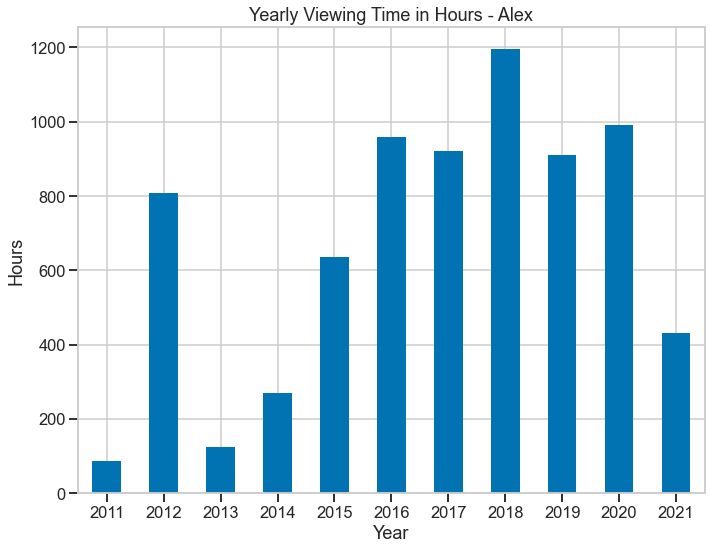

In [104]:
alex_year = alex.groupby('year')['hours'].sum().reset_index()
alex_year.plot(x='year',y='hours',kind='bar',figsize=(10,8),legend=False)
plt.title('Yearly Viewing Time in Hours - Alex')
plt.ylabel('Hours')
plt.xlabel('Year')
plt.xticks(rotation=0)

plt.savefig('hours_by_year_alex.png', bbox_inches='tight');

Just like with all profiles, 2018 was my most active year. Interstingly, 2012 had over 800 hours of logged viewing time. This outlier will require future investigation. 

## How was my activity during the pandemic?

In [48]:
alex_2020 = alex[alex['year'] == 2020]
alex_2020.head()

,start_time,title,duration,day,hour,month,year,seconds,minutes,hours,state
1106,2020-12-20 16:23:03-06:00,Dark,0 days 00:11:12,Sunday,16,12,2020,672.0,11.200000,0.186667,Arkansas
1114,2020-12-18 23:40:14-06:00,La Leyenda del Diamante,0 days 00:29:58,Friday,23,12,2020,1798.0,29.966667,0.499444,Arkansas
1116,2020-12-18 21:36:37-06:00,Hillbilly Elegy,0 days 01:51:43,Friday,21,12,2020,6703.0,111.716667,1.861944,Arkansas
1117,2020-12-18 21:05:59-06:00,Runaway Bride,0 days 00:28:34,Friday,21,12,2020,1714.0,28.566667,0.476111,Arkansas
1119,2020-12-18 15:47:20-06:00,Big Mouth,0 days 00:24:41,Friday,15,12,2020,1481.0,24.683333,0.411389,Arkansas


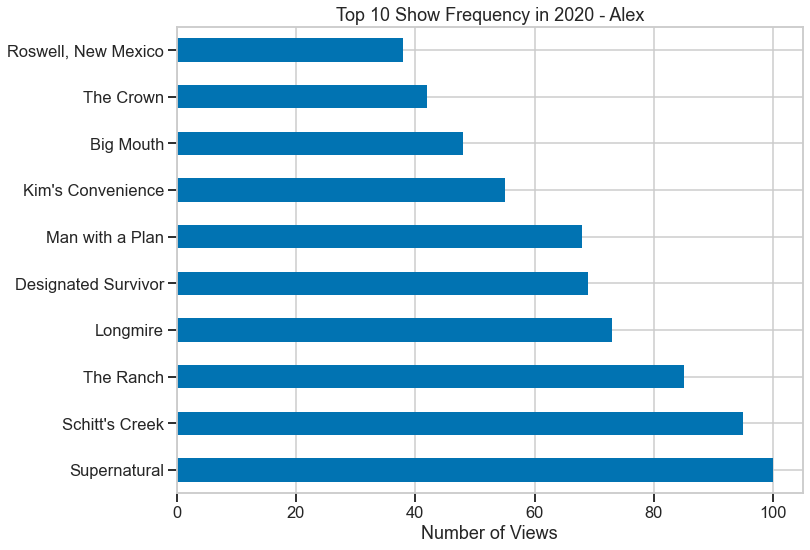

In [89]:
# My top 10 shows in 2020
alex_2020['title'].value_counts()[:10].plot(kind='barh', figsize=(10,8))
plt.title('Top 10 Show Frequency in 2020 - Alex')
plt.xlabel('Number of Views');

Supernatural's final season came out this year so I had to refresh and catch up to be able to enjoy the final season.

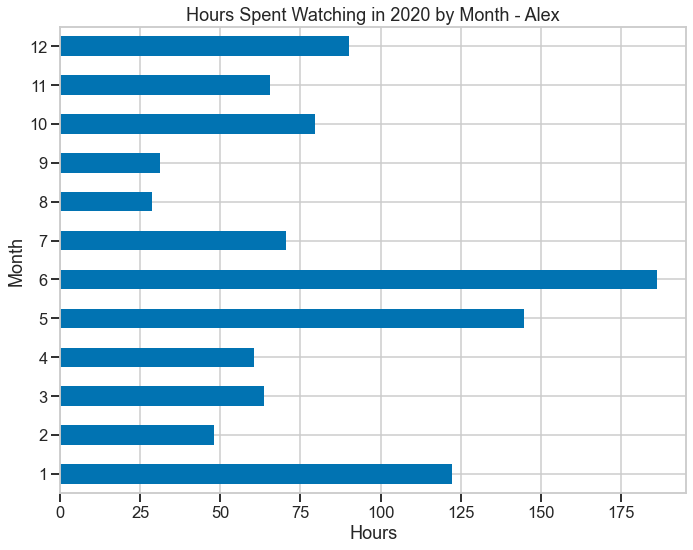

In [90]:
hours_2020 = alex_2020.groupby('month')['hours'].sum().reset_index()
hours_2020.plot(x='month',y='hours',kind='barh',figsize=(10,8),legend=False)
plt.title('Hours Spent Watching in 2020 by Month - Alex')
plt.ylabel('Month')
plt.xlabel('Hours');

Viewing time peaked in May and June. Since I have not done a montly analysis for another year, it could simply be that summers are my most active months. If not, then May and June having been the first two months where lockdowns and restrictions were put in place in the U.S. could expain the spikes in activity. 

## When and how much Star Trek did I watch?

In [51]:
star_trek = alex[alex['title'] == 'Star Trek']
star_trek.head()

,start_time,title,duration,day,hour,month,year,seconds,minutes,hours,state
9468,2017-11-03 13:49:13-05:00,Star Trek,0 days 00:21:55,Friday,13,11,2017,1315.0,21.916667,0.365278,Arkansas
9523,2017-10-25 22:48:46-05:00,Star Trek,0 days 00:16:29,Wednesday,22,10,2017,989.0,16.483333,0.274722,Arkansas
9524,2017-10-25 22:36:01-05:00,Star Trek,0 days 00:12:40,Wednesday,22,10,2017,760.0,12.666667,0.211111,Arkansas
9535,2017-10-24 14:27:27-05:00,Star Trek,0 days 00:32:14,Tuesday,14,10,2017,1934.0,32.233333,0.537222,Arkansas
9538,2017-10-24 14:07:55-05:00,Star Trek,0 days 00:19:25,Tuesday,14,10,2017,1165.0,19.416667,0.323611,Arkansas


In [52]:
star_trek['hours'].sum()

370.43638888888887

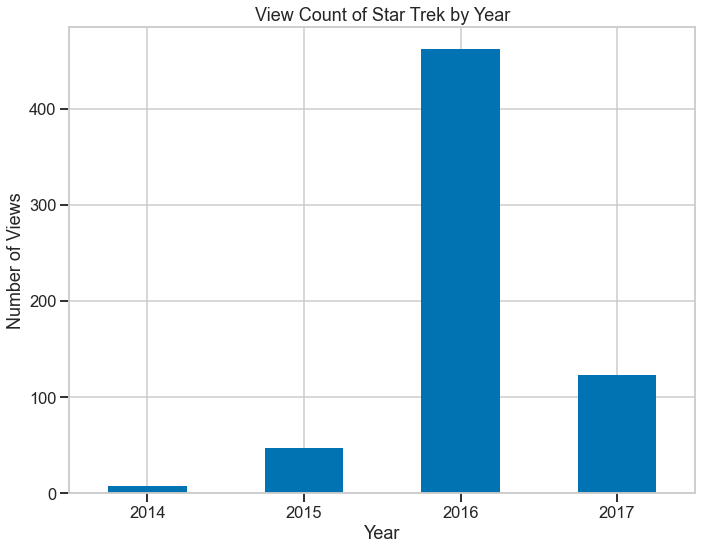

In [91]:
star_trek['year'].value_counts().sort_index().plot(kind='bar',figsize=(10,8))
plt.title('View Count of Star Trek by Year')
plt.ylabel('Number of Views')
plt.xlabel('Year')
plt.xticks(rotation=0);

The vast majority of my Star Trek views were on 2016, and I have not watched any of the shows since 2017. 

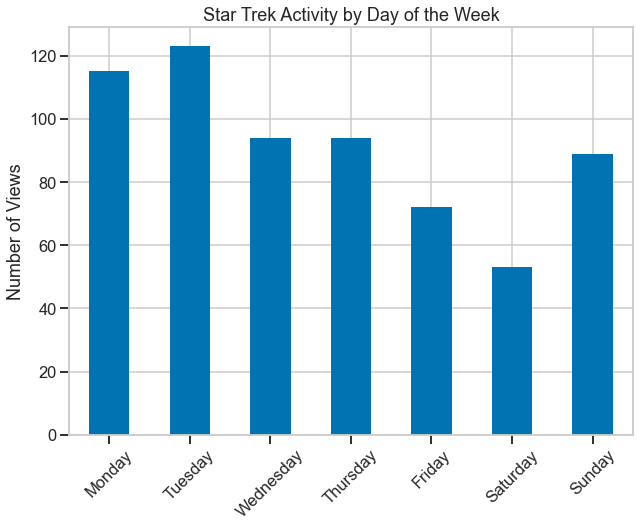

In [92]:
star_trek['day'].value_counts().sort_index().plot(kind='bar', figsize=(9,7))
plt.title('Star Trek Activity by Day of the Week')
plt.ylabel('Number of Views')
plt.xticks(rotation=45);

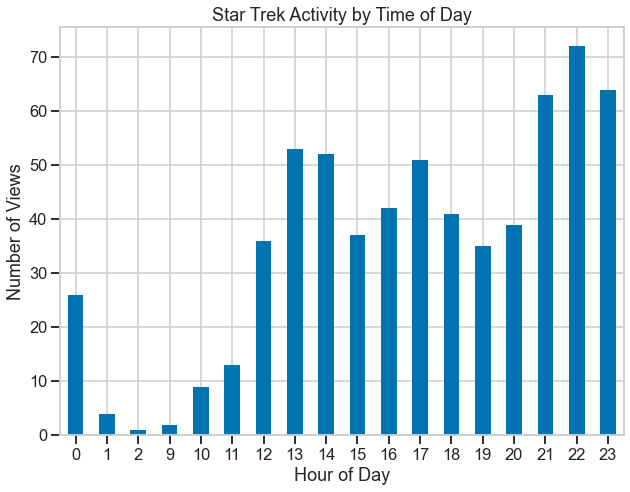

In [93]:
star_trek['hour'].value_counts(dropna=False).sort_index().plot(kind='bar', figsize=(9,7))
plt.title('Star Trek Activity by Time of Day')
plt.ylabel('Number of Views')
plt.xlabel('Hour of Day')
plt.xticks(rotation=0);

Similar to the all profile's viewing activity, my Star Trek viewing time peaked at night. 

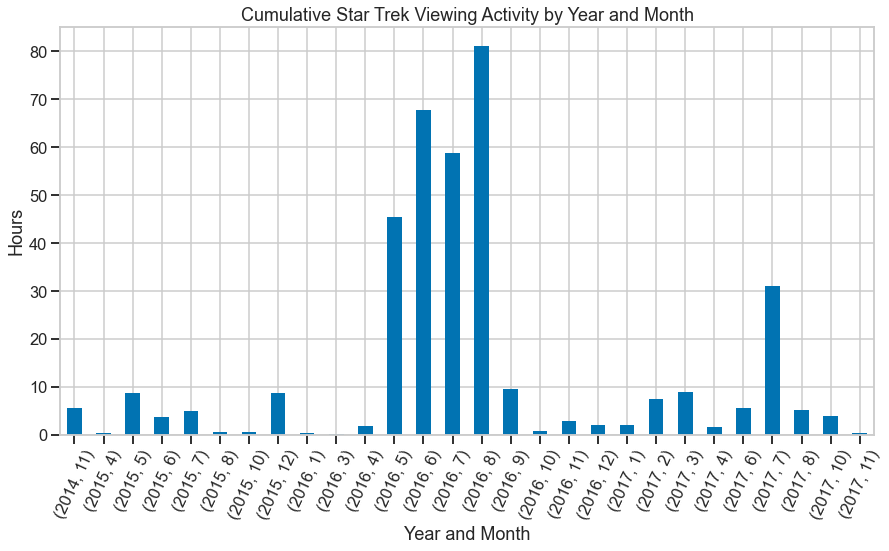

In [94]:
ym_hours = star_trek.groupby(['year','month'])['hours'].sum()
ym_hours.plot(kind='bar', figsize=(13,7))
plt.title('Cumulative Star Trek Viewing Activity by Year and Month')
plt.ylabel('Hours')
plt.xlabel('Year and Month')
plt.xticks(rotation=65);

Here I dive even deeper into when I watched Star Trek. We now see that I watched the vast majority of my Star Trek activity during the summer months of 2016. 